In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
from wordcloud import wordcloud

In [157]:
Hulu = pd.read_csv("../Data/Hulu_titles.csv") 

In [158]:
ls -al ../Data


total 47448
drwxr-xr-x@ 18 jaclynhuff  staff      576 Aug 26 11:10 ./
drwxr-xr-x@ 12 jaclynhuff  staff      384 Aug 28 12:58 ../
drwxr-xr-x@ 13 jaclynhuff  staff      416 Aug 26 10:15 .ipynb_checkpoints/
-rw-r--r--   1 jaclynhuff  staff  4354431 Aug 24 08:38 Combine Data Sets.csv
-rw-r--r--   1 jaclynhuff  staff  1017519 Aug 23 18:30 Hulu.csv
-rw-r--r--@  1 jaclynhuff  staff  1560860 Aug  1 14:57 HuluRaw.csv
-rw-r--r--   1 jaclynhuff  staff  2022635 Aug 15 16:47 Hulu_titles.csv
-rw-r--r--   1 jaclynhuff  staff    53968 Aug 17 12:30 Netflix90.csv
-rw-r--r--   1 jaclynhuff  staff  1362263 Aug 17 12:30 NetflixMOVIE.csv
-rw-r--r--   1 jaclynhuff  staff    38093 Aug  4 14:12 NetflixOriginals.csv
-rw-r--r--   1 jaclynhuff  staff   727496 Aug 17 12:30 NetflixSHOW.csv
-rw-r--r--   1 jaclynhuff  staff  2022635 Aug 17 09:59 Netflix_titles.csv
-rw-r--r--   1 jaclynhuff  staff  2034350 Aug 17 12:30 PythonRecodeforNetflix.csv
-rw-r--r--   1 jaclynhuff  staff   506067 Aug  4 14:12 Streaming Services

In [159]:
Hulu.head() 

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


## Checking out the dimensions of this DataFrame


In [160]:
Hulu.shape

(5850, 15)

In [161]:
Hulu.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [162]:
Hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

### Checking to see if there's any duplicates.

In [163]:
Hulu.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [164]:
Hulu.isnull().sum() 

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

<AxesSubplot:>

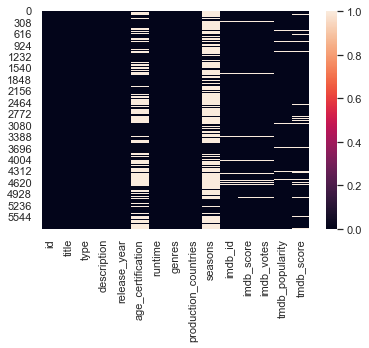

In [165]:
sns.heatmap(Hulu.isnull()) 

### Checking the unique of genres

In [166]:
Hulu['genres'].unique()


array(["['documentation']", "['drama', 'crime']",
       "['drama', 'action', 'thriller', 'european']", ...,
       "['drama', 'animation', 'music']",
       "['animation', 'family', 'scifi']",
       "['documentation', 'music', 'reality']"], dtype=object)

### Question:1 How have runtime changed over the years?

### Customers are feeling that the movies we watch are getting longer and longer.

In [167]:
Hulu=Hulu[Hulu['runtime']>40]

In [168]:
Hulu.describe() 

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,4645.000000,4645.000000,1085.000000,4357.000000,4.351000e+03,4574.000000,4414.00000
mean,2016.236168,90.454037,1.917972,6.467707,2.676360e+04,23.935988,6.69893
std,7.209608,31.672227,2.517412,1.159332,1.049536e+05,89.079166,1.10132
min,1945.000000,41.000000,1.000000,1.500000,5.000000e+00,0.009442,1.00000
25%,2016.000000,62.000000,1.000000,5.700000,6.150000e+02,2.776250,6.00000
50%,2018.000000,93.000000,1.000000,6.600000,2.662000e+03,6.802000,6.80000
75%,2020.000000,110.000000,2.000000,7.300000,1.165400e+04,16.670000,7.40000
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.00000


In [171]:
plt.hist['runtime'],range=(40,200), bins = 15)
plt.title('movie runtime', fontsize = 20)
plt.xlabel('minutes', fontsize = 15)
plt.ylabel('numbers of movies', fontsize = 15)
plt.show() 

SyntaxError: cannot assign to literal (4213667368.py, line 1)